<a href="https://colab.research.google.com/github/Siddha-Regilla/Data-Science-Classroom-notebooks/blob/main/Normal_Distribution_%26_Confidence_Interval_14_02_2024_%26_15_02_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
#Importing Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # for visualizations
import seaborn as sns # for visualizations
import scipy
import warnings

In [8]:
#Importing functions from the above library
from scipy import stats
warnings.filterwarnings('ignore')

# ***14-02-2024***

In [3]:
#Finding Z-score for x= 70 when, mean = 60, and sd = 10
stats.norm.cdf(70,60,10)

0.8413447460685429

In [4]:
#Alternatively, z-score = x-mean/sd = (70-60)/10 = 10/10 = 1
stats.norm.cdf(1)

0.8413447460685429

In [5]:
# Probability for values below <= 70
1-stats.norm.cdf(70,60,10)

0.15865525393145707

In [6]:
# to use R codes - go to runtime and change it to r

 **Following codes are in R**

In [1]:
#Finding Z-score for x= 70 when, mean = 60, and sd = 10
pnorm(70,60,10)

[1] 0.8413447

In [2]:
#What is the probability of getting GMAT score <=680, where mean = 711, sd=29
pnorm(680,711,29)

[1] 0.1425426

In [3]:
#What is the probability of getting GMAT score >680, where mean = 711, sd=29
1-pnorm(680,711,29)

[1] 0.8574574

In [4]:
# Probability of GMAT score lying in the range of 697 - 740 where, mean = 711 and sd = 29
pnorm(740,711,29)-pnorm(697,711,29)

[1] 0.5267112

 **Following codes are in Python**

 to use Python codes - go to runtime and change it to python

Q1. Which stock is more riskier Glaxo or BEML

In [1]:
#install the required libraries
#Upload the files - BEML & GLAXO

In [9]:
# read the files - BEML
beml_df = pd.read_csv("BEML.csv")
beml_df[0:5]

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1121.0,1151.00,1121.00,1134.0,1135.60,101651.0,1157.18
1,2010-01-05,1146.8,1149.00,1128.75,1135.0,1134.60,59504.0,676.47
2,2010-01-06,1140.0,1164.25,1130.05,1137.0,1139.60,128908.0,1482.84
3,2010-01-07,1142.0,1159.40,1119.20,1141.0,1144.15,117871.0,1352.98
4,2010-01-08,1156.0,1172.00,1140.00,1141.2,1144.05,170063.0,1971.42


In [10]:
# read the files - GLAXO
glaxo_df = pd.read_csv("GLAXO.csv")
glaxo_df[0:5]

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1613.00,1629.10,1602.00,1629.0,1625.65,9365.0,151.74
1,2010-01-05,1639.95,1639.95,1611.05,1620.0,1616.80,38148.0,622.58
2,2010-01-06,1618.00,1644.00,1617.00,1639.0,1638.50,36519.0,595.09
3,2010-01-07,1645.00,1654.00,1636.00,1648.0,1648.70,12809.0,211.00
4,2010-01-08,1650.00,1650.00,1626.55,1640.0,1639.80,28035.0,459.11


In [11]:
# gain or daily return = (Today's closing price - yesterday's closing price) / (yesterday's closing price)
# selecting only the required columns from the data frame - date and close
beml_df = beml_df[['Date', 'Close']]
glaxo_df = glaxo_df[['Date', 'Close']]

In [12]:
#Printing the edited dataset with only the required columns - BEML
beml_df

,Date,Close
0,2010-01-04,1135.60
1,2010-01-05,1134.60
2,2010-01-06,1139.60
3,2010-01-07,1144.15
4,2010-01-08,1144.05
...,...,...
1734,2016-12-26,950.25
1735,2016-12-27,975.70
1736,2016-12-28,974.40
1737,2016-12-29,986.05


In [13]:
#Printing the edited dataset with only the required columns - Glaxo
glaxo_df

,Date,Close
0,2010-01-04,1625.65
1,2010-01-05,1616.80
2,2010-01-06,1638.50
3,2010-01-07,1648.70
4,2010-01-08,1639.80
...,...,...
1734,2016-12-26,2723.50
1735,2016-12-27,2701.75
1736,2016-12-28,2702.15
1737,2016-12-29,2727.90


In [14]:
# While ploting the closing price, the y-axis consists of closing price and the x-axis consists of the indexes.
# So that we can track the closing price against the year we set the index to DateTime data type
# It becomes easier to track the closing price as compared to tracking it against the index numbers.
'''The DataFrames have a date column, so we can
create a DatetimeIndex index from this column Date. It will ensure that the rows are sorted by time in
ascending order.'''
glaxo_df = glaxo_df.set_index(pd.DatetimeIndex(glaxo_df['Date']))
beml_df = beml_df.set_index(pd.DatetimeIndex(beml_df['Date']))

In [15]:
#Printing the dataset with edited indexes - BEML
beml_df

,Date,Close
Date,,
2010-01-04,2010-01-04,1135.60
2010-01-05,2010-01-05,1134.60
2010-01-06,2010-01-06,1139.60
2010-01-07,2010-01-07,1144.15
2010-01-08,2010-01-08,1144.05
...,...,...
2016-12-26,2016-12-26,950.25
2016-12-27,2016-12-27,975.70
2016-12-28,2016-12-28,974.40


In [16]:
#Printing the dataset with edited indexes - Glaxo
glaxo_df

,Date,Close
Date,,
2010-01-04,2010-01-04,1625.65
2010-01-05,2010-01-05,1616.80
2010-01-06,2010-01-06,1638.50
2010-01-07,2010-01-07,1648.70
2010-01-08,2010-01-08,1639.80
...,...,...
2016-12-26,2016-12-26,2723.50
2016-12-27,2016-12-27,2701.75
2016-12-28,2016-12-28,2702.15


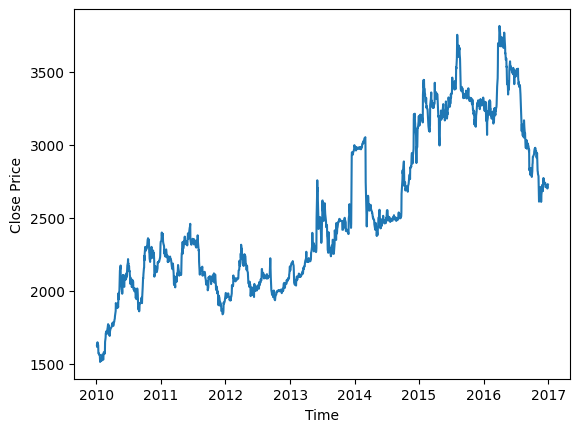

In [17]:
# import the required libraries to create visualizations using the line plot
#Using the line plot to understand year on year (YoY) how the stock price has changed for Glaxo
plt.plot(glaxo_df.Close)
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.show()

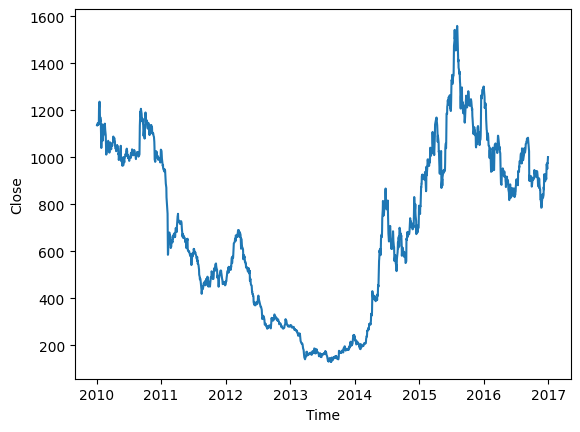

In [18]:
#Using the line plot to understand year-on-year (YoY) how the stock price has changed for BEML
plt.plot(beml_df.Close);
plt.xlabel('Time');
plt.ylabel('Close');
# the use of the ';' is similar to that of the code line - plt.show() - the output that we get will only be the plot without any warnings or any other extra text

In [19]:
# The above visualizations were to analyse the data
# The main task is to find out the daily rate of return.
# SO we apply the percentage change function [.pct_change(periods=1)] onto the Closing column and storing it in a column called gain
# Calculate the gain against each row and add it to the new column - 'gain'. periods = 1 calculates it for the 2 consecutive dates
glaxo_df['gain'] = glaxo_df.Close.pct_change(periods = 1)
beml_df['gain'] = beml_df.Close.pct_change(periods = 1)
beml_df
glaxo_df

,Date,Close,gain
Date,,,
2010-01-04,2010-01-04,1625.65,NaN
2010-01-05,2010-01-05,1616.80,-0.005444
2010-01-06,2010-01-06,1638.50,0.013422
2010-01-07,2010-01-07,1648.70,0.006225
2010-01-08,2010-01-08,1639.80,-0.005398
...,...,...,...
2016-12-26,2016-12-26,2723.50,-0.001283
2016-12-27,2016-12-27,2701.75,-0.007986
2016-12-28,2016-12-28,2702.15,0.000148


In [20]:
# Dropping the null values. The first row is NaN as there is no prior date against which it could calculate the gain
glaxo_df = glaxo_df.dropna()
beml_df = beml_df.dropna()
# As the 4th Jan row has null values, that row is dropped. So the records start from 5th Jan row
glaxo_df

,Date,Close,gain
Date,,,
2010-01-05,2010-01-05,1616.80,-0.005444
2010-01-06,2010-01-06,1638.50,0.013422
2010-01-07,2010-01-07,1648.70,0.006225
2010-01-08,2010-01-08,1639.80,-0.005398
2010-01-11,2010-01-11,1629.45,-0.006312
...,...,...,...
2016-12-26,2016-12-26,2723.50,-0.001283
2016-12-27,2016-12-27,2701.75,-0.007986
2016-12-28,2016-12-28,2702.15,0.000148


In [21]:
# As the 4th Jan row has null values, that row is dropped. So the records start from 5th Jan row
beml_df

,Date,Close,gain
Date,,,
2010-01-05,2010-01-05,1134.60,-0.000881
2010-01-06,2010-01-06,1139.60,0.004407
2010-01-07,2010-01-07,1144.15,0.003993
2010-01-08,2010-01-08,1144.05,-0.000087
2010-01-11,2010-01-11,1137.00,-0.006162
...,...,...,...
2016-12-26,2016-12-26,950.25,-0.021924
2016-12-27,2016-12-27,975.70,0.026782
2016-12-28,2016-12-28,974.40,-0.001332


In [22]:
# checking for null values in the Glaxo dataset
glaxo_df.isnull().sum()

Date     0
Close    0
gain     0
dtype: int64

In [23]:
# checking for null values in the BEML dataset
beml_df.isnull().sum()

Date     0
Close    0
gain     0
dtype: int64

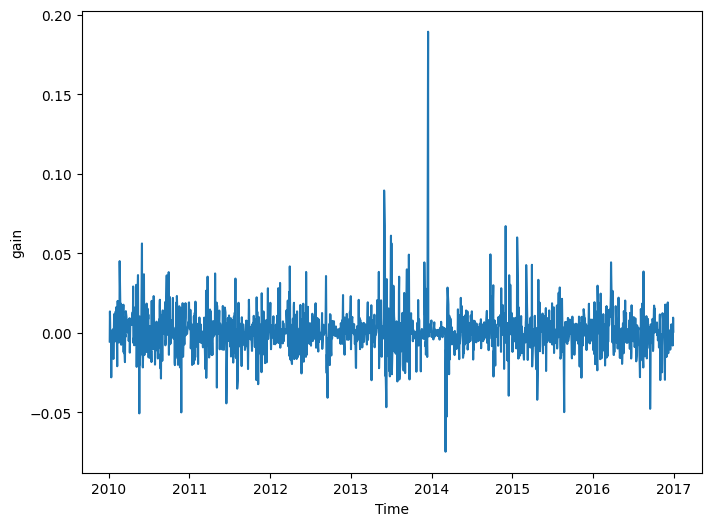

In [24]:
#Plot the gains or returns for Glaxo dataset using line plot
plt.figure(figsize = (8, 6)) # defines the image size
plt.plot(glaxo_df.index, glaxo_df.gain) #we can directly write the code as - plt.plot(glaxo_df.gain) - as it automatically takes the index values as the x-axis
plt.xlabel('Time')
plt.ylabel('gain')
plt.show()

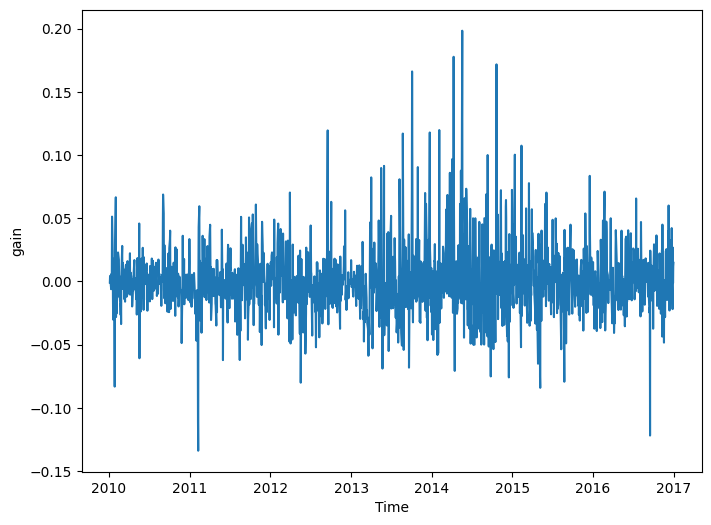

In [25]:
#Plot the gains or returns for BEML dataset using line plot
plt.figure(figsize = (8, 6))
plt.plot(beml_df.gain)
plt.xlabel('Time')
plt.ylabel('gain')
plt.show()

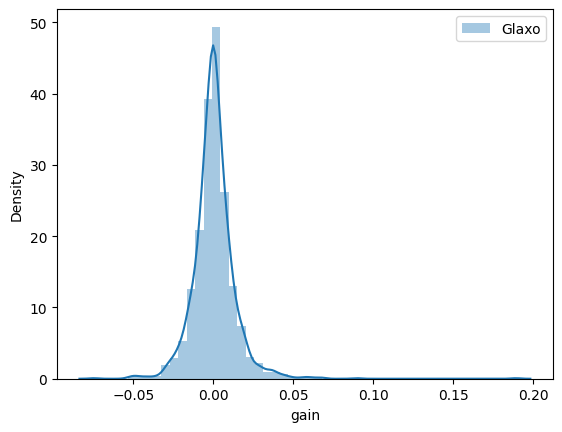

In [26]:
#Creating distribution plot of the gains or returns for Glaxo dataset to understand the standard deviation of the dataset
sns.distplot(glaxo_df.gain, label = 'Glaxo')
plt.xlabel('gain')
plt.ylabel('Density')
plt.legend()
plt.show()

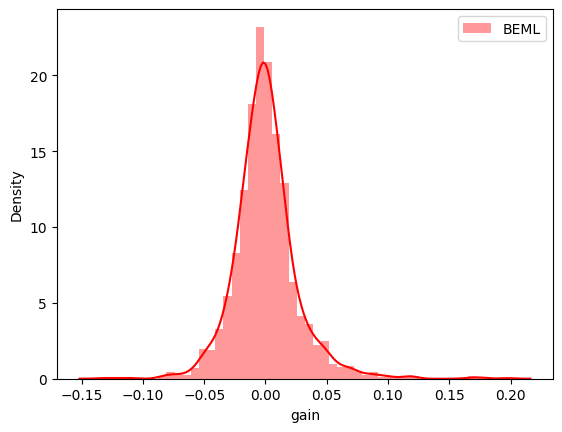

In [27]:
#Creating distribution plot of the gains or returns for BEML dataset to understand the standard deviation of the dataset
sns.distplot(beml_df.gain, label = 'BEML',color="r") # changing the colour of the distribution to a different one from Glaxo dataset
plt.xlabel('gain')
plt.ylabel('Density')
plt.legend()
plt.show()

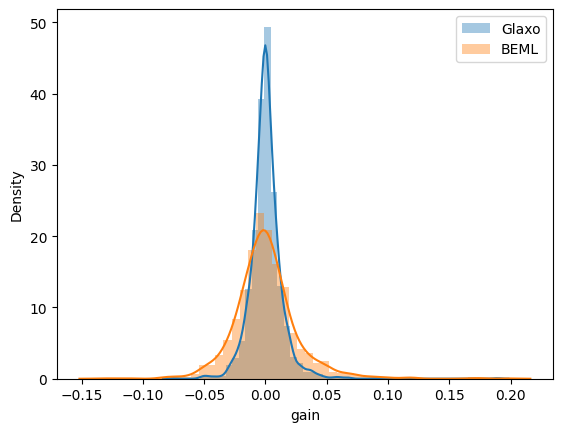

In [28]:
# Combining both the distribution plots to compare them both together and find out which stock is more riskier
# 1st we are creating an empty dataframe 'X' with columns  -  "beml_df.gain","glaxo_df.gain"
X = pd.DataFrame(columns = ["beml_df.gain","glaxo_df.gain"])
# 2nd we are filling each columns with values.
# pd.Series - In any given dataset we have columns. The columns a.k.a Series. Series are 1-dimensional columns that can hold any type of data.
# We want our data in the form of columns. Therefore we are converting the values in the gain column into Series and asigning it to the newly created column.
X["beml_df.gain"] = pd.Series(beml_df.gain)
X["glaxo_df.gain"] = pd.Series(glaxo_df.gain)
# 3rd After assigning values into the new data frame, we are plotting the distributions of both the stocks together.
sns.distplot(X['glaxo_df.gain'],label = 'Glaxo')
sns.distplot(X['beml_df.gain'],label = 'BEML')
plt.xlabel('gain')
plt.ylabel('Density')
plt.legend()

From the above 2 distribution plots BEML has greater base,i.e, greater standard deviation or greater variance. Therefore BEML is riskier than Glaxo

Visually we have understood that the daily rate of return for the stock is 0%. Now we'll be applying the mean and standar deviation functions.

In [29]:
# Finding the mean for Glaxo
glaxo_df['gain'].mean()

0.0003860410825922916

In [30]:
# Finding the mean for BEML
beml_df['gain'].mean()

0.0002707480790572326

In [31]:
# As the answer contains multiple decimal points, we need to round it off
# To round off numbers we use a function round() from the numpy library mentioning the value to be rounded - glaxo_df.gain.mean() & also the no. of decimal places required - 4
# Printing the mean and std for Glaxo dataset
print('Mean:', np.round(glaxo_df.gain.mean(), 4))
print('Standard Deviation: ', np.round(glaxo_df.gain.std(), 4))

Mean: 0.0004
Standard Deviation:  0.0134


In [32]:
# Similarly, printing the mean and std for BEML dataset
print('Mean: ', np.round(beml_df.gain.mean(), 4))
print('Standard Deviation: ', np.round(beml_df.gain.std(), 4))

Mean:  0.0003
Standard Deviation:  0.0264


From the above values we infer that both the stocks are making close to 0 returns - [ Mean for Glaxo = 0.0004 and mean for BEML = 0.0003 ].
Through the Standard deviation values we can quantify that the std for BEML is more - [ std for BEML = 0.0264 and std for Glaxo = 0.0134 ]. Hence its more riskier.

Q2. What is the probability of making 2% loss or more in Glaxo and BEML

In [33]:
# import the required scipy library for stats

In [34]:
#Probability of making 2% loss or higher in Glaxo
prob = stats.norm.cdf( -0.02,
glaxo_df.gain.mean(),
glaxo_df.gain.std())
print('Probability of making a loss of -2% or more in Glaxo = ',prob)

Probability of making a loss of -2% or more in Glaxo =  0.06352488667177401


In [35]:
#Probability of making 2% loss or higher in BEML
prob2 = stats.norm.cdf( -0.02,
loc=beml_df.gain.mean(),
scale=beml_df.gain.std())
print('Probability of making a loss of -2% or more in BEML = ',prob2)

Probability of making a loss of -2% or more in BEML =  0.22155987503755292


Q3. What is the probability of making 2% gain or more in Glaxo and BEML

In [36]:
#Probability of making 2% gain or higher in Glaxo
prob3 = 1 - stats.norm.cdf(0.02,
glaxo_df.gain.mean(),
glaxo_df.gain.std())
print('Probability of making a gain of -2% or more in Glaxo = ',prob3)

Probability of making a gain of -2% or more in Glaxo =  0.07104511457618568


In [37]:
#Probability of making 2% gain or higher in BEML
prob4 = 1 - stats.norm.cdf(0.02,
beml_df.gain.mean(),
beml_df.gain.std())
print('Probability of making a gain of -2% or more in BEML = ',prob4)

Probability of making a gain of -2% or more in BEML =  0.22769829484075355


# ***15-02-2024***

In [38]:
#Reading the Glaxo file
glaxo_df=pd.read_csv('glaxo_df.csv')
print(glaxo_df)

            Date      Date.1    Close      gain
0     2010-01-05  2010-01-05  1616.80 -0.005444
1     2010-01-06  2010-01-06  1638.50  0.013422
2     2010-01-07  2010-01-07  1648.70  0.006225
3     2010-01-08  2010-01-08  1639.80 -0.005398
4     2010-01-11  2010-01-11  1629.45 -0.006312
...          ...         ...      ...       ...
1733  2016-12-26  2016-12-26  2723.50 -0.001283
1734  2016-12-27  2016-12-27  2701.75 -0.007986
1735  2016-12-28  2016-12-28  2702.15  0.000148
1736  2016-12-29  2016-12-29  2727.90  0.009529
1737  2016-12-30  2016-12-30  2729.80  0.000697

[1738 rows x 4 columns]


In [39]:
#Checking the confidence interval for Confidence level of 95%
glaxo_df_ci = stats.norm.interval(0.95,
loc = glaxo_df.gain.mean(),
scale = glaxo_df.gain.std())
print( 'Gain at 95% confidence interval is:', np.round(glaxo_df_ci, 4))

Gain at 95% confidence interval is: [-0.0258  0.0266]


In [40]:
#Checking the confidence interval for Confidence level of 90%
glaxo_df_ci = stats.norm.interval(0.90,
loc = glaxo_df.gain.mean(),
scale = glaxo_df.gain.std())
print( 'Gain at 90% confidence interval is:', np.round(glaxo_df_ci, 4))

Gain at 90% confidence interval is: [-0.0216  0.0224]


In [42]:
#Checking the confidence interval for Confidence level of 99%
glaxo_df_ci = stats.norm.interval(0.99,
loc = glaxo_df.gain.mean(),
scale = glaxo_df.gain.std())
print( 'Gain at 99% confidence interval is:', np.round(glaxo_df_ci, 4))

Gain at 99% confidence interval is: [-0.034   0.0348]


In [54]:
#Reading the BEML file
beml_df=pd.read_csv('beml_df.csv')
print(beml_df)

            Date      Date.1    Close      gain
0     2010-01-05  2010-01-05  1134.60 -0.000881
1     2010-01-06  2010-01-06  1139.60  0.004407
2     2010-01-07  2010-01-07  1144.15  0.003993
3     2010-01-08  2010-01-08  1144.05 -0.000087
4     2010-01-11  2010-01-11  1137.00 -0.006162
...          ...         ...      ...       ...
1733  2016-12-26  2016-12-26   950.25 -0.021924
1734  2016-12-27  2016-12-27   975.70  0.026782
1735  2016-12-28  2016-12-28   974.40 -0.001332
1736  2016-12-29  2016-12-29   986.05  0.011956
1737  2016-12-30  2016-12-30  1000.60  0.014756

[1738 rows x 4 columns]


In [44]:
#Checking the confidence interval for Confidence level of 95%
beml_df_ci = stats. norm.interval(0.95,
loc=beml_df.gain.mean(),
scale=beml_df.gain.std())
print( 'Gain at 95% confidence interval is:', np.round(beml_df_ci, 4))

Gain at 95% confidence interval is: [-0.0515  0.0521]


In [45]:
#To find out the Z value for 95% we need to give 0.975 as distance covered from both side is 97.5% (95+2.5%) or in simple words = stats.norm.ppf(CL+(aplha/2))
stats.norm.ppf(0.975) # (cl+(alpha/2)) = (95+5/2)

1.959963984540054

In [48]:
#To find out the Z value for 90%
stats.norm.ppf(0.95) # (cl+(alpha/2)) = (90+10/2)

1.6448536269514722

In [49]:
#To find out the Z value for 99%
stats.norm.ppf(0.995) # (cl+(alpha/2)) = (99+1/2)

2.5758293035489004

In [50]:
#When we dont have population standard deviation we use t-score and when we have the standard deviation of sample

In [51]:
#To find out the t value for 95%, we need to give 0.975 (CL+alpha/2) and degrees of freedom (sample-1) = stats.t.ppf(CL+(alphha/2), df)
stats.t.ppf(0.975,139) # sample size = 140

1.977177724476122

In [52]:
# Using Glaxo dataset, check the no. of observations(no. of row), it will give us the n value. Using that we get our df value.
# Formula for t-value Confidence interval is - stats.t.interval(CL,df,mean,sample std)
stats.t.interval(0.95,1737 ,glaxo_df.gain.mean() , glaxo_df.gain.std()) #here n = 1738. Therefore, df = n-1 = 1738-1 = 1737

(-0.025818392673534002, 0.02659047483871859)

In [53]:
# Using BEML dataset, check the no. of observations(no. of row), it will give us the n value. Using that we get our df value.
stats.t.interval(0.95,1737 ,beml_df.gain.mean() , beml_df.gain.std())  # here n=1738. Therefore, df = n-1 = 1737

(-0.05156885177136772, 0.05211034792948219)